<a href="https://colab.research.google.com/github/iosifdaniel07/-Handwriting-to-Text-Converter-/blob/main/best_lstm_after_reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50

Epoch 1: loss improved from inf to 0.00162, saving model to best_model.h5


14674/14674 - 236s - 16ms/step - auc: 0.9999 - loss: 0.0016 - val_auc: 1.0000 - val_loss: 9.4906e-11 - learning_rate: 1.0000e-03
Epoch 2/50

Epoch 2: loss improved from 0.00162 to 0.00003, saving model to best_model.h5


14674/14674 - 242s - 16ms/step - auc: 1.0000 - loss: 3.0733e-05 - val_auc: 1.0000 - val_loss: 1.3515e-10 - learning_rate: 1.0000e-03
Epoch 3/50

Epoch 3: loss improved from 0.00003 to 0.00002, saving model to best_model.h5


14674/14674 - 234s - 16ms/step - auc: 1.0000 - loss: 2.2414e-05 - val_auc: 1.0000 - val_loss: 1.2613e-10 - learning_rate: 1.0000e-03
Epoch 4/50

Epoch 4: loss improved from 0.00002 to 0.00000, saving model to best_model.h5


14674/14674 - 234s - 16ms/step - auc: 1.0000 - loss: 9.1618e-09 - val_auc: 1.0000 - val_loss: 1.4978e-14 - learning_rate: 1.0000e-03
Epoch 5/50

Epoch 5: ReduceLROnPlateau reducing learning rate to 1.0000000474974512e-06.

Epoch 5: loss improved from 0.00000 to 0.00000, saving model to best_model.h5


14674/14674 - 231s - 16ms/step - auc: 1.0000 - loss: 9.5552e-11 - val_auc: 1.0000 - val_loss: 1.0185e-15 - learning_rate: 1.0000e-03
Epoch 6/50

Epoch 6: loss improved from 0.00000 to 0.00000, saving model to best_model.h5


14674/14674 - 234s - 16ms/step - auc: 1.0000 - loss: 4.4493e-11 - val_auc: 1.0000 - val_loss: 1.0175e-15 - learning_rate: 1.0000e-06
Epoch 7/50

Epoch 7: loss did not improve from 0.00000
14674/14674 - 233s - 16ms/step - auc: 1.0000 - loss: 8.2776e-11 - val_auc: 1.0000 - val_loss: 1.0146e-15 - learning_rate: 1.0000e-06
Epoch 8/50

Epoch 8: ReduceLROnPlateau reducing learning rate to 9.999999974752428e-10.

Epoch 8: loss did not improve from 0.00000
14674/14674 - 233s - 16ms/step - auc: 1.0000 - loss: 3.1279e-09 - val_auc: 1.0000 - val_loss: 1.0065e-15 - learning_rate: 1.0000e-06
Epoch 9/50

Epoch 9: loss did not improve from 0.00000
14674/14674 - 234s - 16ms/step - auc: 1.0000 - loss: 4.8972e-11 - val_auc: 1.0000 - val_loss: 1.0065e-15 - learning_rate: 1.0000e-09
Epoch 10/50

Epoch 10: loss did not improve from 0.00000
14674/14674 - 238s - 16ms/step - auc: 1.0000 - loss: 1.7935e-09 - val_auc: 1.0000 - val_loss: 1.0065e-15 - learning_rate: 1.0000e-09
Epoch 11/50

Epoch 11: ReduceLROnPla

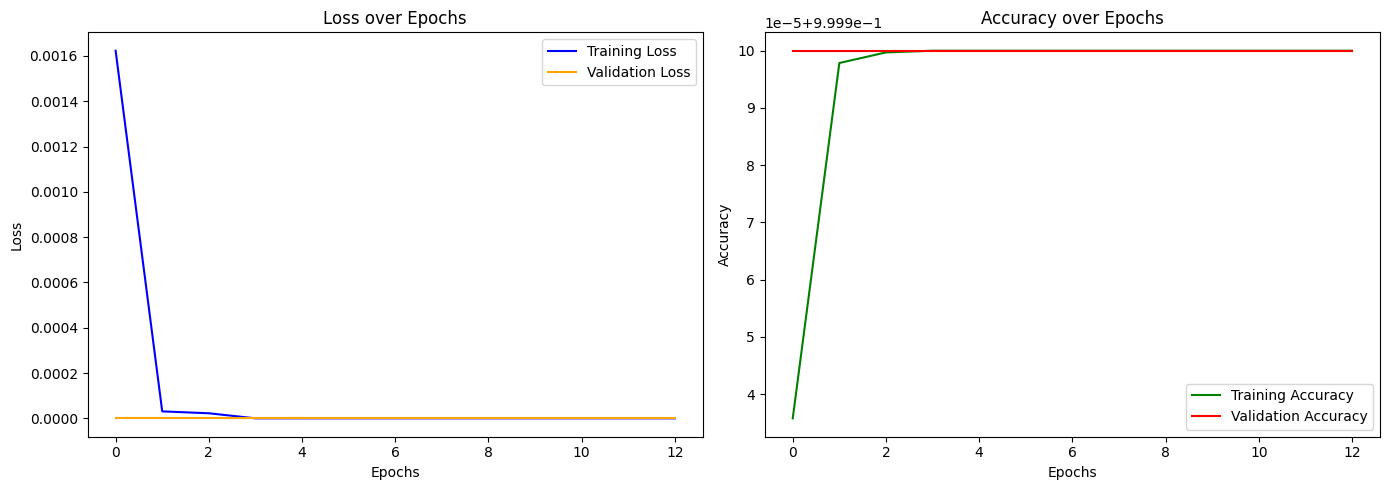

18342/18342 ━━━━━━━━━━━━━━━━━━━━ 71s 4ms/step - auc: 1.0000 - loss: 9.2837e-16
Test Loss: 0.0000
Test Accuracy: 1.0000
18342/18342 ━━━━━━━━━━━━━━━━━━━━ 60s 3ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    475537
           1       1.00      1.00      1.00    111390

    accuracy                           1.00    586927
   macro avg       1.00      1.00      1.00    586927
weighted avg       1.00      1.00      1.00    586927



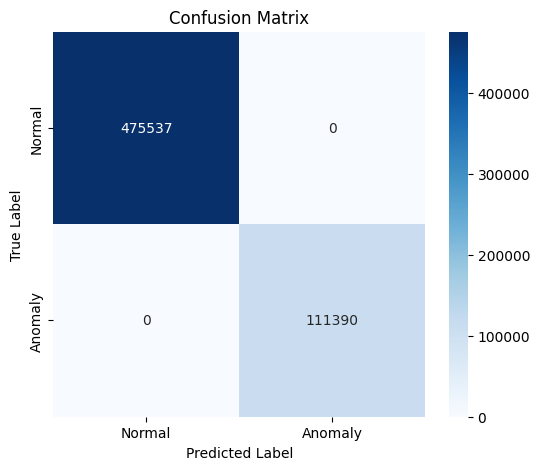

In [ ]:
from google.colab import files
!pip install gdown

from google.colab import files
!pip install -U --no-cache-dir gdown --pre
from google.colab import drive
drive.mount('/content/drive')
#!ls /content/drive/MyDrive
!cp "/content/drive/MyDrive/data_set_normalize_c.csv" .

# -- Imports
import numpy as np
import pandas as pd
import gdown
import seaborn as sns
import matplotlib.pyplot as plt
from keras import Sequential
from keras.src.layers import LSTM, Dropout, Dense
from keras.src.utils import to_categorical
from keras.src.optimizers import Adam, RMSprop, Nadam
from keras.src.metrics import AUC
from keras.src.regularizers import L2
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from tensorflow.python.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Nadam
from tensorflow.keras.metrics import AUC
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

# -- Load and prepare dataset
data_set = pd.read_csv('data_set_normalize_c.csv')
data_set.replace([np.inf, -np.inf], np.nan, inplace=True)
data_set.fillna(data_set.median(), inplace=True)

cols_to_check = [
    'Subflow Bwd Bytes',
    'Active Max',
    'Subflow Bwd Packets',
    'Subflow Fwd Packets',
    'Total Backward Packets',
    'Fwd IAT Std',
    'Active Mean',
    'act_data_pkt_fwd',
    'Total Length of Fwd Packets',
    'Total Fwd Packets'
]

X = data_set.drop(columns=['Label'])
X = data_set.drop(columns=cols_to_check)
y = data_set['Label']

timesteps = 5

def create_sequences(data, labels, timesteps=5):
    X, y = [], []
    for i in range(len(data) - timesteps):
        X.append(data[i:i + timesteps])
        y.append(labels[i + timesteps - 1])
    return np.array(X), np.array(y)

X_seq, y_seq = create_sequences(X, y, timesteps)

X_train, X_test, y_train, y_test = train_test_split(
    X_seq, y_seq, test_size=0.2, random_state=42, shuffle=True
)

# -- Build the model
def create_keras_model_v4():
    model = Sequential([
        LSTM(128, return_sequences=True, input_shape=(timesteps, X_train.shape[2]) ),
        Dropout(0.3),
        LSTM(64, return_sequences=False),
        Dropout(0.3),
        Dense(100, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(loss=BinaryCrossentropy(), optimizer=Nadam(), metrics=[AUC(name='auc')])
    return model

model = create_keras_model_v4()

early_stopping = EarlyStopping(monitor='loss', patience=7, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='loss', factor=0.001, patience=3, verbose=1)
checkpoint = ModelCheckpoint('best_model.h5', monitor='loss', save_best_only=True, verbose=1)

# -- Train the model
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=128,
    callbacks=[early_stopping, reduce_lr, checkpoint],
    validation_split=0.2,
    verbose=2
)

# -- Save training history
history_df = pd.DataFrame(history.history)
history_df.to_csv('training_history_10.csv', index=False)

# -- Plot training history
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['auc'], label='Training Accuracy', color='green')
plt.plot(history.history['val_auc'], label='Validation Accuracy', color='red')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# -- Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# -- Predict and analyze results
y_pred_probs = model.predict(X_test)
y_pred_classes = (y_pred_probs > 0.5).astype(int).reshape(-1)

print(classification_report(y_test, y_pred_classes))

# -- Confusion Matrix
cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Anomaly'], yticklabels=['Normal', 'Anomaly'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# -- Optional: Save model
model.save('anomaly_detection_10_rmsp.h5')